# Creating Simulation Dataset

In [31]:
#creating my own dataset for unsupervised learning

AVG_PRICE = 100

# the age follows gaussian distribution
#1 year = 12months, 2 years = 24 months 
AVG_AGE = 12


# Senior used 38 hours, 1 day = 24, 3.5days = 84 hours, 7 days = 168 hours
MAX_TRANSACTION_DIFF = 168


MAX_NUM_REVIEWS = 50

A_VALUE = 50 # remains the same
B_VALUE = 100 
C_VALUE = 200
BETA1 = 0.2
BETA2 = 0.3
BETA3 = 0.5
BETA4 = 0.7

In [32]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np
import math

 
# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame()

'''
Adapted from: 
https://www.reneshbedre.com/blog/random-dataset-norm-distribution-python.html
https://www.statology.org/pandas-generate-random-data/
https://towardsdatascience.com/the-ultimate-guide-for-column-creation-with-pandas-dataframes-83b8c565110e
https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
'''

df['account_age'] = np.random.normal(loc=0, scale=1, size=500)
df['account_age'] = df.apply(lambda row: row['account_age']+AVG_AGE, axis=1)
df['total_price_reviews'] = np.random.randint(1, AVG_PRICE, size=(500,1))
df['time_btwn_transactions'] = np.random.randint(0,MAX_TRANSACTION_DIFF,size=(500, 1))
df['total_reviews'] = np.random.randint(0,MAX_NUM_REVIEWS,size=(500, 1))
df['old_x'] = 0
df['old_rep_score'] = 0


In [33]:
df

,account_age,total_price_reviews,time_btwn_transactions,total_reviews,old_x,old_rep_score
0,14.929306,46,140,5,0,0
1,12.130946,66,153,16,0,0
2,9.440367,95,24,6,0,0
3,11.536687,99,88,16,0,0
4,13.084367,90,82,9,0,0
...,...,...,...,...,...,...
495,13.916301,47,151,17,0,0
496,11.983947,35,34,6,0,0
497,11.403583,9,59,48,0,0
498,13.788206,68,71,23,0,0


# Calculating X and Reputation Score for Buyers

In [39]:
# calculate the total assuming beta1, beta2, beta3, beta4 is all 1

def calculateX(row):
    global BETA1, BETA2, BETA3, BETA4
    beta1 = BETA1
    beta2 = BETA2
    beta3 = BETA3
    beta4 = BETA4
    return row['old_x']+row['time_btwn_transactions']*beta1+row['account_age']*beta2+row['total_price_reviews']*beta3


# calculating reputation score 

def calculateRep(row):
    global A_VALUE, B_VALUE, C_VALUE
    a = A_VALUE
    b = B_VALUE
    c = C_VALUE
    temp1 = row['x_value']-b
    temp2 = c + (row['x_value']-b)*(row['x_value']-b)
    temp3 = temp1/math.sqrt(temp2)
    temp4 = temp3 +1
    return a * temp4
    

In [40]:
df['x_value'] = df.apply(calculateX, axis=1)
df['rep_score'] = df.apply(calculateRep, axis=1)

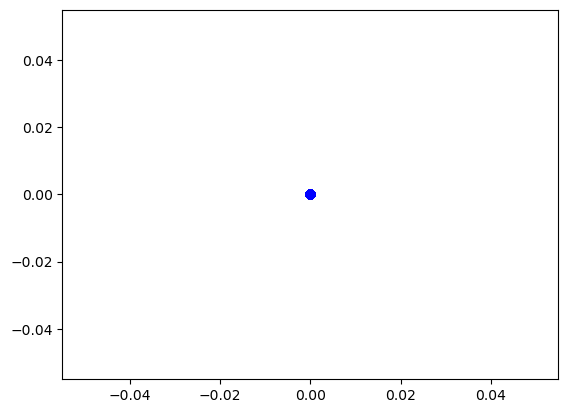

In [42]:
import matplotlib.pyplot as plt
 

plt.scatter(df['old_x'], df['old_rep_score'], c ="blue")

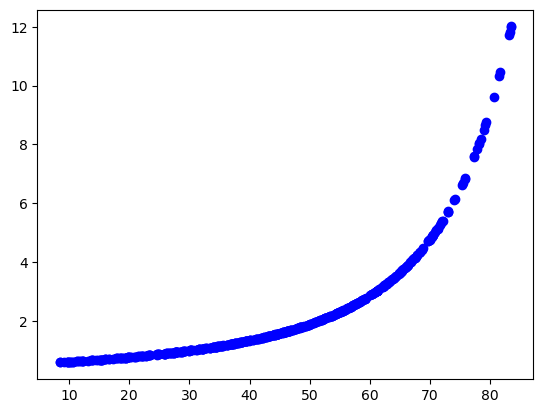

Hyperparamters: 
a: 50
b: 100
c: 200
beta1: 0.20
beta2: 0.30
beta3: 0.50
beta4: 0.70


In [43]:
plt.scatter(df['x_value'], df['rep_score'], c ="blue")
 
# To show the plot
plt.show()
print("Hyperparamters: ")
print("a: %d" % A_VALUE)
print("b: %d" % B_VALUE)
print("c: %d" % C_VALUE)
print("beta1: %.2f" % BETA1)
print("beta2: %.2f" % BETA2)
print("beta3: %.2f" % BETA3)
print("beta4: %.2f" % BETA4)

# Calculating X and Reputation Score for Sellers

In [43]:
A_VALUE_S = 50 # remains the same

#cvalue and betas value change together --> can change according to how tolerant the system wants to be 
#b_value is redundant 
B_VALUE_S = 0 
C_VALUE_S = 3000
BETA_S = 0.001

# Creating Empty DataFrame and Storing it in variable df
df1 = pd.DataFrame(np.random.randint(0,100,size=(500, 2)), columns=['review', 'reputation_score']) 


df1['review_reputation_score'] =df1.apply(lambda row: row['review']*row['reputation_score'], axis=1)

def calculateX_S(oldX, rep_score, rincoming, raverage):
    global BETA_S
    return oldX + rep_score * (rincoming-raverage)*BETA_S


# calculating reputation score 

def calculateRep_S(x):
    global A_VALUE_S, B_VALUE_S, C_VALUE_S
    a = A_VALUE_S
    b = B_VALUE_S
    c = C_VALUE_S
    temp1 = x-b
    temp2 = c + (x-b)*(x-b)
    temp3 = temp1/math.sqrt(temp2)
    temp4 = temp3 +1
    return a * temp4


AVG_REVIEW = 50 #start 
OLD_X = 0 #start
R_INCOMING = 60
REP_SCORE = 1
AVG_REVIEW = calculateRep_S(calculateX_S(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW))
print(AVG_REVIEW)

50.0091287091396


# Simulation 1: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?


In [ ]:
#declaring first time user parameters
user_age = 0
user_total_price_reviews = 0
total_reviews = 0
user_x = 0
user_rep = 0

repList = []
xList = []
repList.append(0)
xList.append(0)

#the user tries to inflate within a month and price 100wei
    while user_rep < 100:
        user_total_price_reviews += 100
        total_reviews += 1
        user_x = calculateX

# Simulation 2: Can a user create multiple different accounts, to influence reviews? (spam attack with un trusted users)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?


# Simulation 3: Can a user create multiple different accounts, to influence reviews? (spam attack with fully trusted users)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

# Simulation 4: Can a user create multiple different accounts, to influence reviews? (spam attack with mixed time gaps with low reputation score)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

# Simulation 5: Can a user create multiple different accounts, to influence reviews? (spam attack with only long time durations between the attacks)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?